<a href="https://colab.research.google.com/github/mariavitoria03/projeto_quiz/blob/master/implementa%C3%A7oes_em_python_2%C2%B0_uni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ELIMINAÇÃO DE GAUSS
import numpy as np

A = np.array ([
  [  3,  7,   -4,   3],
  [ -12,   -23,  13,  -16],
  [ 6,   24,   -11, -8],
  [  -21,  -34,  10,  -8]
])
b = np.array([
  [ -7],
  [ 10],
  [-47],
  [  7],
])

Aa = np.concatenate((A,b),1)
pivo = 3
fator = Aa[1,0]/pivo
Aa[1, : ] = Aa[1, : ] - fator * Aa[0, : ]

fator = Aa[2,0]/pivo
Aa[2, : ] = Aa[2, : ] - fator * Aa[0, : ]

fator = Aa[3,0]/pivo
Aa[3, : ] = Aa[3, : ] - fator * Aa[0, : ]

pivo = 5
fator = Aa[2,1]/pivo
Aa[2, : ] = Aa[2, : ] - fator * Aa[1, : ]

fator = Aa[3,1]/pivo
Aa[3, : ] = Aa[3, : ] - fator * Aa[1, : ]

pivo = 3
fator = Aa[3,2]/pivo
Aa[3, : ] = Aa[3, : ] - fator * Aa[2, : ]

U = Aa[0:, 0:4]
y = Aa[0:, 4:]

#resolve x assim
x  = np.linalg.solve(U,y)

print(Aa) #matriz estendida
print(U) #matriz U
print(y) #matriz Y (ultima coluna da matriz Aa)
print('A matriz x é\n',x) #solução x
print(A@x) #verificar se minha solução está correta (Ax = b)

[[  3   7  -4   3  -7]
 [  0   5  -3  -4 -18]
 [  0   0   3  -6   3]
 [  0   0   0   7  21]]
[[ 3  7 -4  3]
 [ 0  5 -3 -4]
 [ 0  0  3 -6]
 [ 0  0  0  7]]
[[ -7]
 [-18]
 [  3]
 [ 21]]
A matriz x é
 [[-3.]
 [ 3.]
 [ 7.]
 [ 3.]]
[[ -7.]
 [ 10.]
 [-47.]
 [  7.]]


In [ ]:
#DECOMPOSIÇÃO LU (sem a matriz estendida de gauss)
# Ax = b ==> A = LU ==> LUx = b ==> Ux = y ==> Ly = b (encontro y)
# (depois de encontrar y) Ux = y (encontro x)

import numpy as np

A = np.array ([
  [  3,  7,   -4,   3],
  [ -12,   -23,  13,  -16],
  [ 6,   24,   -11, -8],
  [  -21,  -34,  10,  -8]
])
copiaA = np.copy(A)

b = np.array([
  [ -7],
  [ 10],
  [-47],
  [  7],
])

L = np.eye(4)
pivo = 3
fator = A[1,0]/pivo
L[1,0] = fator
A[1, : ] = A[1, : ] - fator * A[0, : ]

fator = A[2,0]/pivo
L[2,0] = fator
A[2, : ] = A[2, : ] - fator * A[0, : ]

fator = A[3,0]/pivo
L[3,0] = fator
A[3, : ] = A[3, : ] - fator * A[0, : ]

pivo = 5
fator = A[2,1]/pivo
L[2,1] = fator
A[2, : ] = A[2, : ] - fator * A[1, : ]

fator = A[3,1]/pivo
L[3,1] = fator
A[3, : ] = A[3, : ] - fator * A[1, : ]

pivo = 3
fator = A[3,2]/pivo
L[3,2] = fator
A[3, : ] = A[3, : ] - fator * A[2, : ]

U = A[0:, :]
#para encontrar y: 
Y  = np.linalg.solve(L,b)
#para encontrar x:
x  = np.linalg.solve(U,Y)

print(U) #matriz U
print(L) #matriz L
print('A matriz y é\n',Y)#matriz Y solução  
print("verificando se y está correto\n", L@Y) #verificando se y está correto (Ly = b)
print('A matriz x é\n', x) #matriz x solução
print("verificando se x está correto\n", copiaA@x) #verificando se x está correto 

[[ 3  7 -4  3]
 [ 0  5 -3 -4]
 [ 0  0  3 -6]
 [ 0  0  0  7]]
[[ 1.  0.  0.  0.]
 [-4.  1.  0.  0.]
 [ 2.  2.  1.  0.]
 [-7.  3. -3.  1.]]
A matriz y é
 [[ -7.]
 [-18.]
 [  3.]
 [ 21.]]
verificando se y está correto
 [[ -7.]
 [ 10.]
 [-47.]
 [  7.]]
A matriz x é
 [[-3.]
 [ 3.]
 [ 7.]
 [ 3.]]
verificando se x está correto
 [[ -7.]
 [ 10.]
 [-47.]
 [  7.]]


In [ ]:
# Metodo de Jacobi

import numpy as np

A = np.array ([
  [  11.,  3,  2],
  [ 2,   12,  3],
  [ -2,   2, -13]
])

b = np.array([
  [  5.],
  [ 11],
  [  2]
])

B = np.array ([
  [  0,  -3/11,  -2/11],
  [ -2/12,   0,  -3/12],
  [ -2/13,   2/13, 0]
])
g = np.array([
  [  5./11],
  [ 11/12],
  [  -2/13]
])

# verificando se o sistema converge para Jacobi (norma linha da matriz int. é <1)
soma_linhas = np.sum(np.abs(B), axis=1)  # Calcula a soma de elementos de cada linha em valor absoluto
maior_soma = np.max(soma_linhas)  # Encontra o maior resultado

print("Maior soma em valor absoluto:", maior_soma)

if maior_soma <1:
    print("O sistema converge para o método de gauss-seidel.")
else:
    print("O sistema não converge para o método de Gauss-Seidel.")
#################################################

x = np.array([[0],[0],[0]])
x = np.zeros((3,1))

for i in range (10):
  xold = np.copy(x)
  x = B@x + g
  Er = np.max(np.abs(x-xold)) / np.max(np.abs(x))
  print(Er)
  print(x)

Maior soma em valor absoluto: 0.45454545454545453
O sistema converge para o método de gauss-seidel.
1.0
[[ 0.45454545]
 [ 0.91666667]
 [-0.15384615]]
0.2524850894632206
[[ 0.23251748]
 [ 0.87937063]
 [-0.08275058]]
0.03162725730819117
[[ 0.22976266]
 [ 0.8986014 ]
 [-0.05433029]]
0.011673320637105918
[[ 0.21935058]
 [ 0.89195546]
 [-0.05094789]]
0.0013412704455569755
[[ 0.22054813]
 [ 0.89284521]
 [-0.05036848]]
0.0003899213230090631
[[ 0.22020012]
 [ 0.89250077]
 [-0.05041583]]
0.00011489145777515536
[[ 0.22030267]
 [ 0.8925706 ]
 [-0.05041529]]
2.1451626037495066e-05
[[ 0.22028352]
 [ 0.89255338]
 [-0.05042032]]
6.28936487380546e-06
[[ 0.22028914]
 [ 0.89255783]
 [-0.05042002]]
1.4195949467808577e-06
[[ 0.22028787]
 [ 0.89255682]
 [-0.0504202 ]]


In [ ]:
#Metodo de gauss-seidel
import numpy as np


A = np.array ([
  [  11.,  3,  2],
  [ 2,   12,  3],
  [ -2,   2, -13]
])
b = np.array([
  [  5.],
  [ 11],
  [  2]
])

B = np.array ([
  [  0,  -3/11,  -2/11],
  [ -2/12,   0,  -3/12],
  [ -2/13,   2/13, 0]
])

g = np.array([
  [  5./11],
  [ 11/12],
  [  -2/13]
])

# verificando se o sistema converge para gauss-seidel (norma linha da matriz int. é <1)
soma_linhas = np.sum(np.abs(B), axis=1)  # Calcula a soma de elementos de cada linha em valor absoluto
maior_soma = np.max(soma_linhas)  # Encontra o maior resultado

print("Maior soma em valor absoluto:", maior_soma)

if maior_soma <1:
    print("O sistema converge para o método de Gauss-Seidel.")
else:
    print("O sistema não converge para o método de Gauss-Seidel.")
#################################################

x = np.array([[0],[0],[0]])
x = np.zeros((3,1))
n,_= np.shape(B)

#interação 1
xold = np.copy(x)
x = np.copy(x)
for i in range (n):
  x[i,0] = B[i,0:]@x + g[i,0] #x= Bx + g
Er = np.max(np.abs(x-xold)) / np.max(np.abs(x))
print(Er)
print(x)

#interação 2
xold = np.copy(x)
x = np.copy(x)

for i in range (n):
  x[i,0] = B[i,0:]@x + g[i,0]
Er = np.max(np.abs(x-xold)) / np.max(np.abs(x))
print(Er)
print(x)

#interação 3
xold = np.copy(x)
x = np.copy(x)

for i in range (n):
  x[i,0] = B[i,0:]@x + g[i,0]
Er = np.max(np.abs(x-xold)) / np.max(np.abs(x))
print(Er)
print(x)



Maior soma em valor absoluto: 0.45454545454545453
O sistema converge para o método de Gauss-Seidel.
1.0
[[ 0.45454545]
 [ 0.84090909]
 [-0.09440559]]
0.23578240904274106
[[ 0.24237127]
 [ 0.89987285]
 [-0.05269206]]
0.026489371429471862
[[ 0.21870596]
 [ 0.89338869]
 [-0.05004881]]


[[89.66 19.8 ]
 [19.8   5.  ]]
[[54.25]
 [11.7 ]]
solução 
 [[ 0.70369712]
 [-0.4466406 ]]
a = 0.7036971205119091
b =  -0.44664059722716015
Erro quadrático
 0.1401261997867044
fde6 
 3.775542125844295


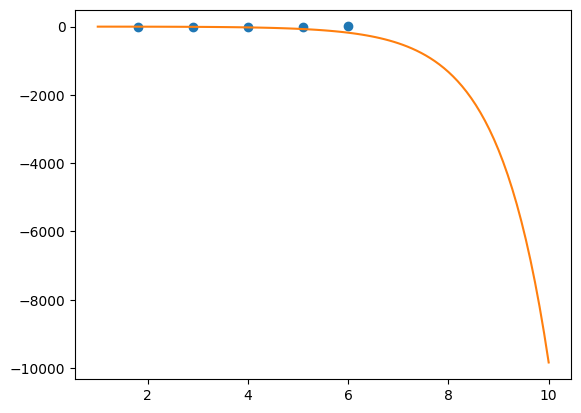

In [ ]:
# MMQ - sistemas lineares do tipo y = a+bx ou y = ax + b
import numpy as np
import matplotlib.pyplot as plt

# pontos dados pela questao
x = np.array([[1.8], [2.9], [4.0], [5.1], [6.0]])
y = np.array([[1.0], [1.5], [2.2], [3.0], [4]])

#concatenação da matriz dos elementos de x com uma matriz de coluna de 1
#ATENÇÃO POIS DEPENDENDO DA FUNÇÃO LINEAR A COLUNA DE UM PODE SER A PRIMEIRA OU A SEGUDA
X = np.concatenate((x,x**0),1) #coluna 1 é a segunda

#no CASO GERAL, X ficaria assim: 
#Ex.: f(x) = a*log(2x) + be^(x)
# X = np.concatenate((np.log(2*x), np.exp(0)),1)
#o restante do código é tudo igual

XTX = np.transpose(X) @ X
XTy= np.transpose(X) @ y
print(XTX)
print(XTy)

solucao = np.linalg.solve(XTX,XTy)
print("solução \n", solucao)

a = solucao[0,0]
b = solucao[1,0]
print("a =", a)
print("b = ", b)

#calculo do vetor erro do sistema
VE =  X @ solucao - y
#erro quadrático
EQ = np.sum(VE**2)
print("Erro quadrático\n", EQ)

## Calcular a função em x = 6 ou seja, f(6)
## f(x) = ax + b
fde6 = a*6 + b
print('fde6 \n', fde6)

#para plotar o grafico
plt.plot(x,y, 'o')
xg = np.linspace(1,10,100)
yg = a*np.log(2*xg) + b*np.exp(xg)
plt.plot(xg,yg)
plt.show()

matriz xlin
 [[1.  1.9]
 [1.  3.2]
 [1.  5.5]] 
 matriz ylin
 [[3.11129061]
 [4.48739965]
 [7.20042489]]
[[ 3.  10.6]
 [10.6 44.1]]
[[14.79911516]
 [59.87346796]]
sol 
 [[0.90181635]
 [1.1409119 ]]
a0 
 2.464074678005797
a1 
 3.1296209535556896
a 
 2.464074678005797
b 
 3.1296209535556896
Erro quadrático
 1783905.9739881433
fde6 
 2315.284213868303


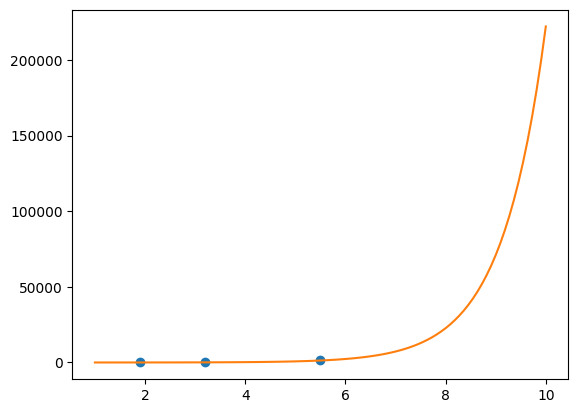

In [ ]:
#MMQ - LINEARIZAÇÃO

import numpy as np
import matplotlib.pyplot as plt

x = np.array([[1.9],[3.2],[5.5]])
y = np.array([[22.45],[88.89],[1340]])

## Caso de linearização do tipo:
## f(x) = a*(b)**x
## ln(f(x)) = ln(a) + x*ln(b)
X = np.concatenate((x**0,x),1)
Y = np.log(y) #y = ln(f(x))
print('matriz xlin\n',X,'\n matriz ylin\n',Y)

XTX = np.transpose(X) @ X
XTy = np.transpose(X) @ Y
print(XTX)
print(XTy)

sol = np.linalg.solve(XTX,XTy)
print("sol \n", sol)


a0 = np.exp(sol[0,0]) 
a1 = np.exp(sol[1,0])
print("a0 \n", a0)
print("a1 \n", a1)

#a0=ln(a) e a1 = ln(b)
#sol[0,0]=ln(a) e sol[1,0] = ln(b), logo:

a = np.exp(sol[0,0])
b = np.exp(sol[1,0])
print("a \n", a)
print("b \n", b)

VE =  X@sol -y
EQ = np.sum(VE**2)
print("Erro quadrático\n", EQ)

## f(6) = ???
## f(x) = a*(b)**x
fde6 = a*b**6
print('fde6 \n', fde6)

plt.plot(x,y, 'o')
xg = np.linspace(1,10,100)
yg = a*(b)**xg
plt.plot(xg,yg)
plt.show()